In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from src.data.toy_data import *
from src.model.boosted_support_subset import *
from src.visualization.plots import *
from src.utils import *

# Overlapping bivariate normals

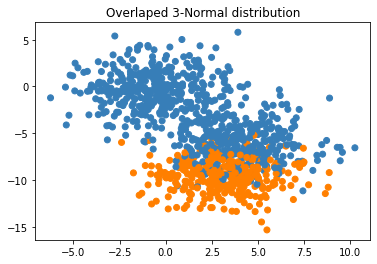

In [33]:
X, y = normal(n=1000, prop_test=0.1, noise=2, centers=3, seed=156899)
plot_toy_set(X, y, 'Overlaped 3-Normal distribution')

## Random forest

In [34]:
rf = RandomForestClassifier(n_estimators=100, max_features='auto', criterion='gini',random_state=1324)

In [35]:
preds = StratifiedKFoldTestPredictions(X, y, rf)
confusion_matrix(preds, y)

real,0,1,total
pred,,,
0,0.60,0.05,0.65
1,0.06,0.28,0.35
total,0.67,0.33,1.00


In [36]:
rf.fit(X, y)

RandomForestClassifier(random_state=1324)

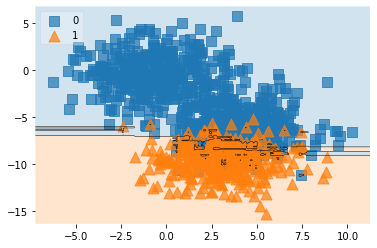

In [37]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, rf, title='')

## SVM

In [38]:
svm = SVC(C=1, gamma = 0.1)

In [39]:
preds = StratifiedKFoldTestPredictions(X, y, svm)
confusion_matrix(svm.predict(X), y)

real,0,1,total
pred,,,
0,0.61,0.04,0.65
1,0.05,0.29,0.35
total,0.67,0.33,1.00


In [40]:
svm.fit(X, y)

SVC(C=1, gamma=0.1)

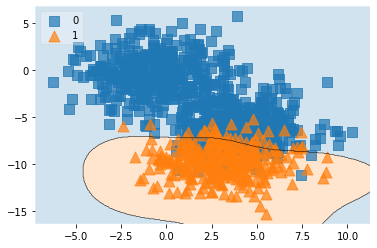

In [41]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, svm, title='')

## BSS

In [119]:
clf = BoostedSupportSubset(params={'C': 1, 'gamma': 0.1,'kernel': 'rbf'}, sample_size=50, n_learners=100, max_features='auto')

In [120]:
preds = StratifiedKFoldTestPredictions(X, y, clf)
confusion_matrix(preds, y)

No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid sample in 1000 iters
No valid s

real,0,1,total
pred,,,
0,0.62,0.06,0.68
1,0.04,0.28,0.32
total,0.67,0.33,1.00


In [121]:
clf.fit(X, y)

In [122]:
len(clf.learners)

24

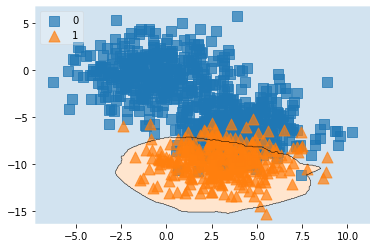

In [123]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, clf, title='')

### Limited learners detail

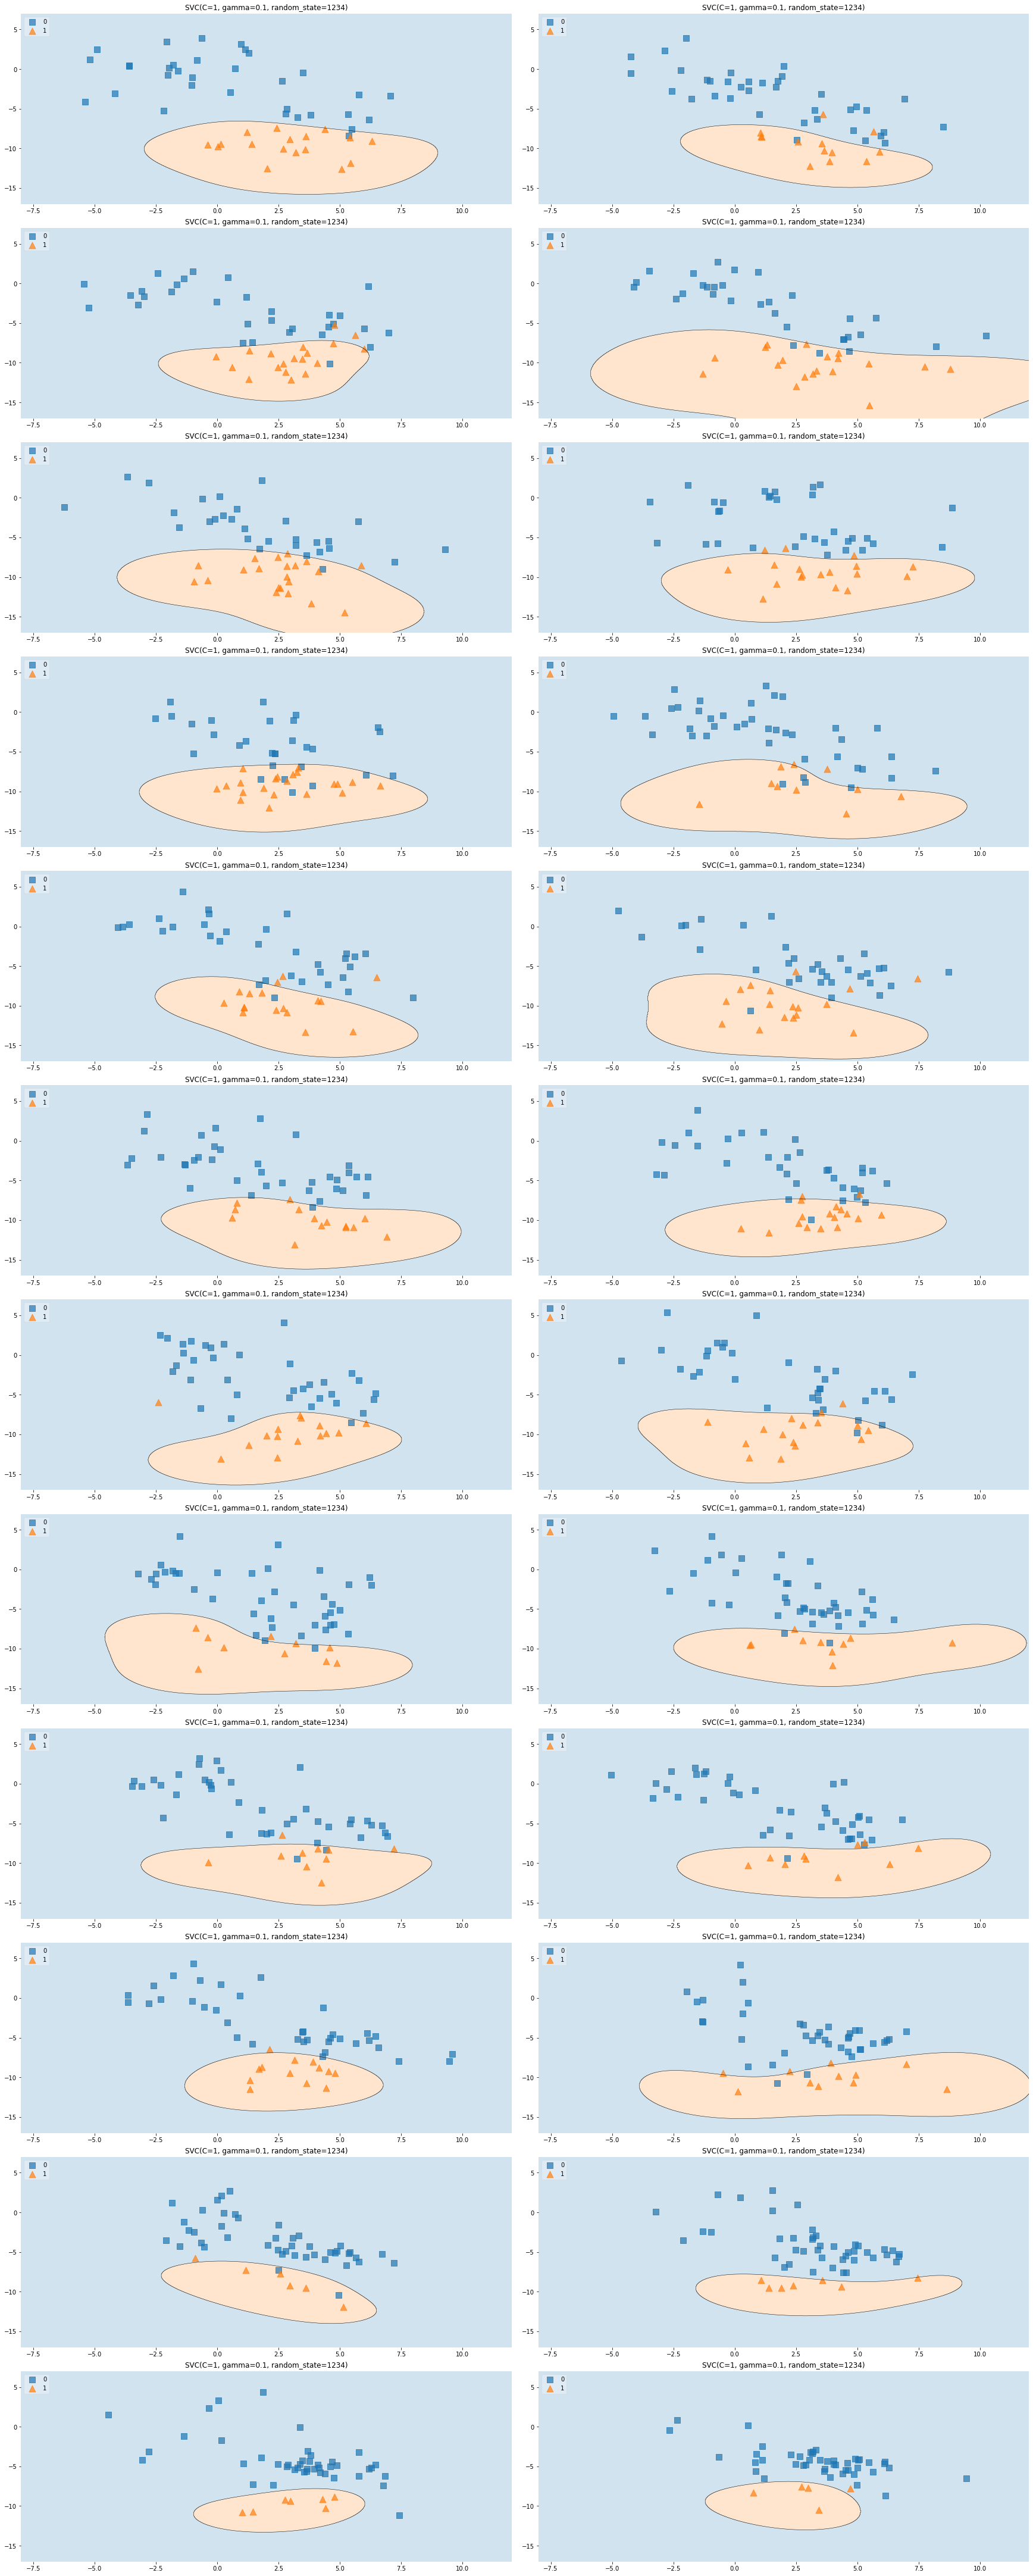

In [124]:
learners = [learner for learner in clf.learners if learner['learner'] is not None]
learners_decision_regions_plot(X, y, learners, zoom=0.1)